In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,log_loss,mean_absolute_error,root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_excel("D:\\Réseaux de neurones\\PrédictionEfficacitéÉnergétiqueBâtiments\\energy+efficiency\\ENB2012_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
X=df.iloc[:,0:8]
Y=df.iloc[:,8:10]


Y.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


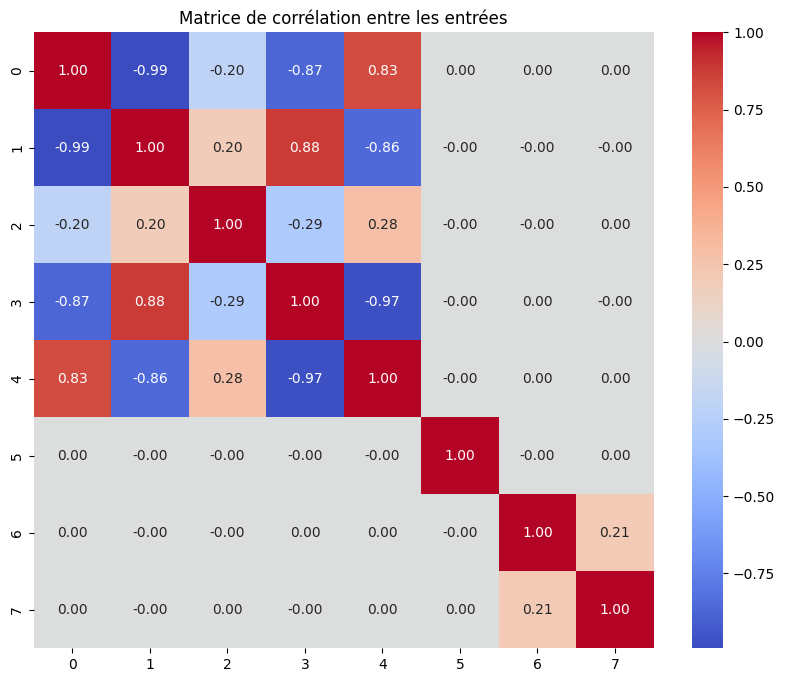

In [65]:
#La recherche de corrélation dans les données d'entrées
Xo=pd.DataFrame(X)
Yo=pd.DataFrame(Y)
correlation_matrix = co.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre les entrées")
plt.show()

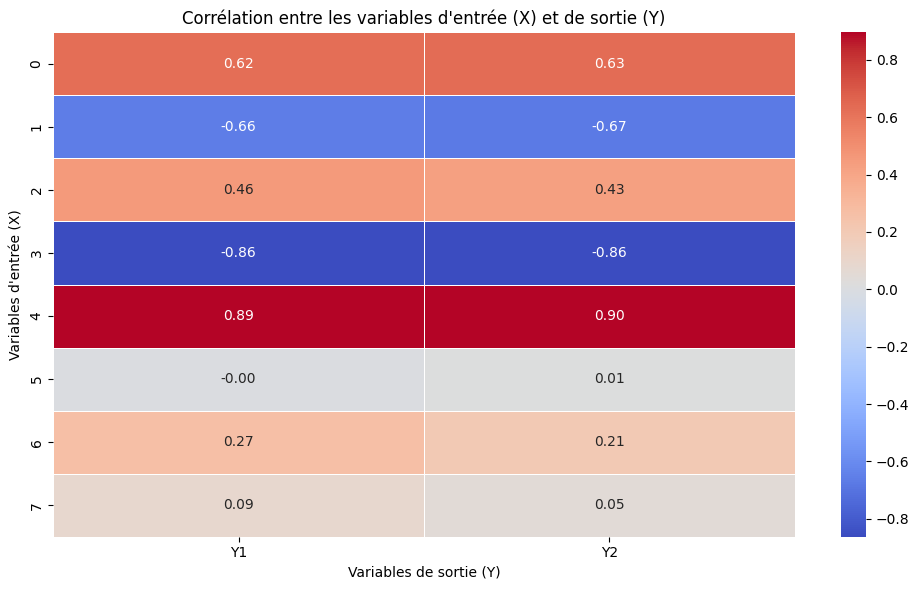

In [66]:
# Estimation de l'intercorrélation avec les output
cor_matrix = pd.concat([Xo, Yo], axis=1).corr()
X_cols = Xo.columns
y_cols = Yo.columns

# Extraire uniquement la partie X vs Y
cor_X_Y = cor_matrix.loc[X_cols, y_cols]
plt.figure(figsize=(10, 6))
sns.heatmap(cor_X_Y, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre les variables d'entrée (X) et de sortie (Y)")
plt.xlabel("Variables de sortie (Y)")
plt.ylabel("Variables d'entrée (X)")
plt.tight_layout()
plt.show()

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(768, 8)

In [15]:
def splitData(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
y_test.head()

,Y1,Y2
668,16.47,16.90
324,13.17,16.39
624,32.82,32.78
690,41.32,46.23
473,16.69,19.76


In [57]:
def bp_model(X_train, y_train,X_test,y_test,string,hidden_layer=(50, 30,20), acti='relu' ,sol='adam',max_it=5000,random_st=42):
    bp = MLPRegressor(hidden_layer_sizes=hidden_layer,  # architecture du réseau
                        activation=acti,
                        solver=sol,
                        max_iter=max_it,
                        random_state=random_st)
    bp.fit(X_train, y_train)
    y_pred = bp.predict(X_test)
    para=devideY(y_test,y_pred)
    
    visualisationYpEtYT(para["y1_test"],para["y2_test"],para["y1_pred"],para["y2_pred"],string,bp.loss_curve_)
    #visualistionMse(bp.loss_curve_)
    #return y_pred
    

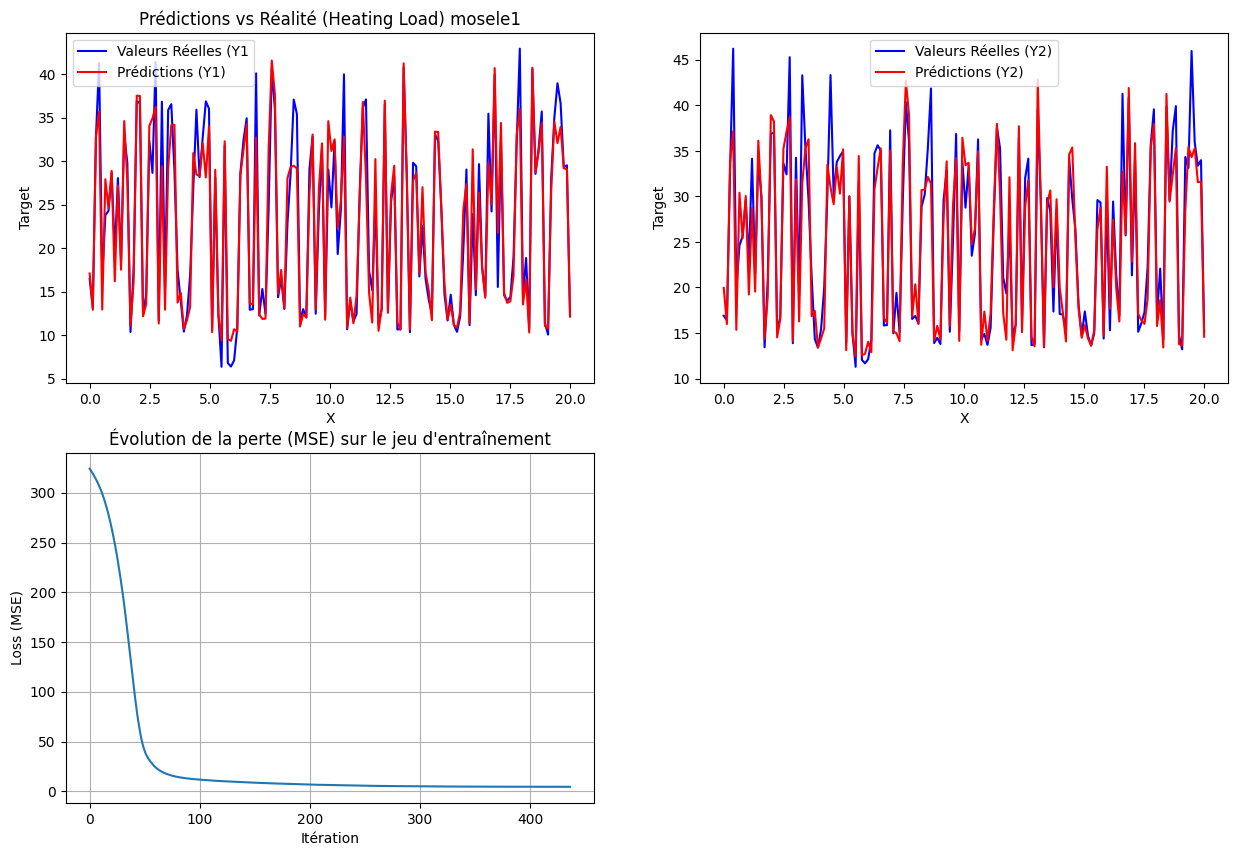

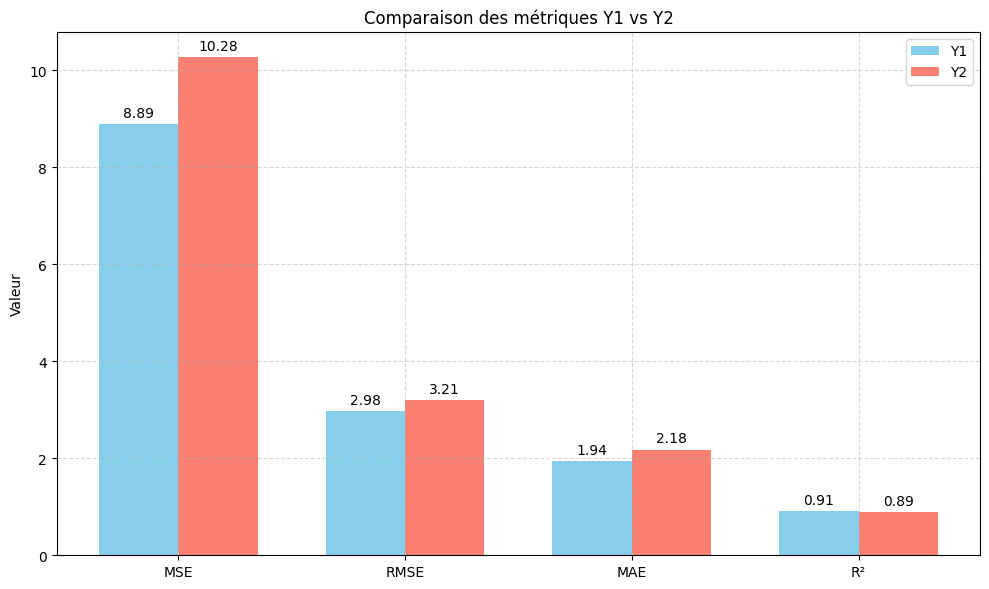

In [60]:
bp_model(X_train, y_train,X_test,y_test,"mosele1",hidden_layer=(13, 10,9), acti='relu' ,sol='adam',max_it=1000,random_st=42)
#print("y_pred :",y_pred.shape)
#y_pred[:,0]

In [53]:
def devideY(y_test,y_pred):
    y1_pred=y_pred[:,0]
    y2_pred=y_pred[:,1]
    y1_test=y_test.iloc[:, 0]
    y2_test=y_test.iloc[:, 1]
    return { "y1_pred":y1_pred,"y2_pred":y2_pred,"y1_test":y1_test,"y2_test":y2_test}

In [59]:
def visualisationYpEtYT(y1_test,y2_test,y1_pred,y2_pred,string,mse):
    
    valeurs = np.linspace(0, 20, 154)
    #plt.figure(figsize=(30, 6))
    plt.figure(figsize=(15, 10))
    #plt.subplot(141)
    plt.subplot2grid((2, 2), (0, 0))
    #plt.scatter(y1_test, y1_pred)
    plt.xlabel("X")
    plt.ylabel("Target")
    plt.title(f"Prédictions vs Réalité (Heating Load) {string}")
    plt.plot(valeurs, y1_test, color='blue',label="Valeurs Réelles (Y1")
    plt.plot(valeurs, y1_pred ,color='red',label="Prédictions (Y1)")
    plt.legend()
    
    #plt.subplot(142)
    plt.subplot2grid((2, 2), (0, 1))
    #plt.scatter(y2_test, y2_pred)
    plt.xlabel("X")
    plt.ylabel("Target")
    #plt.title("Prédictions vs Réalité ( Cooling Load )")
    plt.plot(valeurs, y2_test, color='blue',label="Valeurs Réelles (Y2)")
    plt.plot(valeurs, y2_pred, color='red',label="Prédictions (Y2)")
    plt.legend()

    # Subplot 3 (bas, prend toute la largeur)
    plt.subplot2grid((2, 2), (1, 0))
    #plt.subplot(143)
    plt.plot(mse)
    plt.title("Évolution de la perte (MSE) sur le jeu d'entraînement")
    plt.xlabel("Itération")
    plt.ylabel("Loss (MSE)")
    plt.grid(True)
    #plt.subplot2grid((2, 2), (1, 1))
    visualMetrics(y1_test,y2_test,y1_pred,y2_pred)
    plt.show()
    

In [39]:
#visualisationYpEtYT(para1["y1_test"],para1["y2_test"],para1["y1_pred"],para1["y2_pred"],"modele1")

In [40]:
#visualisationYpEtYT(para2["y1_test"],para2["y2_test"],para2["y1_pred"],para2["y2_pred"],"modele2")

In [26]:
def visualistionMse(mse):
    plt.plot(mse)
    plt.title("Évolution de la perte (MSE) sur le jeu d'entraînement")
    plt.xlabel("Itération")
    plt.ylabel("Loss (MSE)")
    plt.grid(True)
    plt.show()

In [55]:
def visualMetrics(y1_test,y2_test,y1_pred,y2_pred):
    # y1_pred=y_pred[:,0]
    # y2_pred=y_pred[:,1]
    # y1_test=y_test.iloc[:, 0]
    # y2_test=y_test.iloc[:, 1]
    # Calcul des métriques
    mse1 = mean_squared_error(y1_test, y1_pred)
    rmse1 = np.sqrt(mse1)
    r21 = r2_score(y1_test, y1_pred)
    mae1 = mean_absolute_error(y1_test, y1_pred)
    
    mse2 = mean_squared_error(y2_test, y2_pred)
    rmse2 = np.sqrt(mse2)
    r22 = r2_score(y2_test, y2_pred)
    mae2 = mean_absolute_error(y2_test, y2_pred)
    
    # Noms des métriques
    labels = ['MSE', 'RMSE', 'MAE', 'R²']
    y1_scores = [mse1, rmse1, mae1, r21]
    y2_scores = [mse2, rmse2, mae2, r22]
    
    x = np.arange(len(labels))  # position des groupes
    width = 0.35  # largeur des barres
    
    # Création du graphe
    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, y1_scores, width, label='Y1', color='skyblue')
    bars2 = ax.bar(x + width/2, y2_scores, width, label='Y2', color='salmon')
    
    # Labels et mise en forme
    ax.set_ylabel('Valeur')
    ax.set_title('Comparaison des métriques Y1 vs Y2')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    # Affichage des valeurs sur les barres
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Décalage vertical
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()